In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-f9e5ba8d-748a-2d7f-c0fc-82bdfea8b019)


In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

In [7]:
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def tanh_2nd_deriv(x):
    return -2*np.tanh(x) * (1 - np.tanh(x)**2)

In [10]:
ADD_NOISE=False

X = np.linspace(-1,1,50).reshape(-1,1)
y = X**2
# y = np.tanh(X*2)
# y = tanh_deriv(X*4)
# y = tanh_2nd_deriv(X*4)

if ADD_NOISE:
    ep = 0.1
    noise = np.random.normal(0, ep, size=X.shape)
    y = y+noise

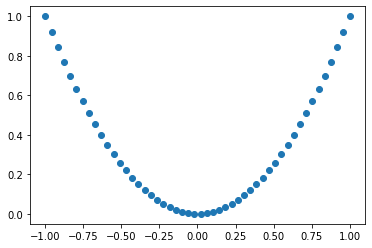

In [11]:
plt.figure()
plt.scatter(X, y)

In [12]:
print(X.shape)
print(y.shape)
input_dim = X.shape[1]
output_dim = y.shape[1]

(50, 1)
(50, 1)


In [70]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(20, activation='tanh'))
# model.add(tf.keras.layers.Dense(3, activation='tanh'))
# model.add(tf.keras.layers.Dense(3, activation='tanh'))
# model.add(tf.keras.layers.Dense(3, activation='relu'))
# model.add(tf.keras.layers.Dense(3, activation='softplus'))

model.add(tf.keras.layers.Dense(output_dim, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_15 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [71]:
# learning_rate=0.01
# lrs_decay_steps=250
# lrs_decay_rate=10

# learning_rate_fn = tf.keras.optimizers.schedules.InverseTimeDecay(
#     learning_rate, lrs_decay_steps, lrs_decay_rate, staircase=True)
# callbacks = [tf.keras.callbacks.LearningRateScheduler(learning_rate_fn)]

callbacks = None


In [72]:
opt = tf.keras.optimizers.Adam()
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mse', optimizer=opt)

In [73]:
%%time
history = model.fit(X, y, epochs=500, batch_size=2, callbacks=callbacks)

Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 0.1110
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0386
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 13/500
25/25 [=================

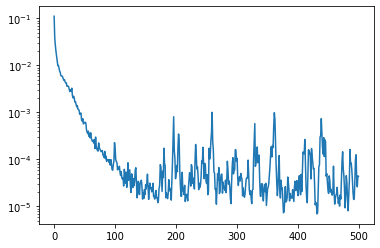

In [74]:
plt.figure()
plt.plot(history.history['loss'])
plt.yscale('log')

In [75]:
yhat = model.predict(X)

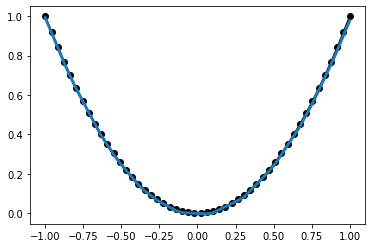

In [76]:
plt.figure()
plt.plot(X, y, 'k-o')
plt.plot(X, yhat, lw=3)

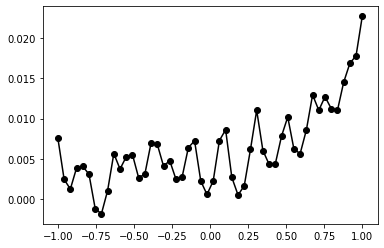

In [77]:
plt.figure()
plt.plot(X, y-yhat, 'k-o')

In [78]:
# yres = (y-yhat)
yres = (y-yhat)*100
# X2 = X[X<0.5]
# yres = yres[X<0.5].reshape(-1,1)
X2 = X.copy()

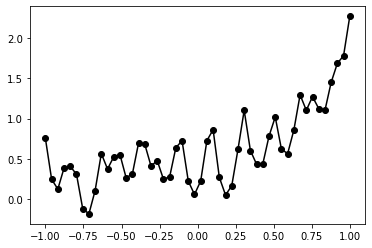

In [79]:
plt.figure()
plt.plot(X2, yres, 'k-o')

In [147]:

# initializer = tf.keras.initializers.GlorotNormal()
# initializer = tf.keras.initializers.Orthogonal()

# initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape=(input_dim,)))
# model2.add(tf.keras.layers.Dense(64, activation='tanh', kernel_initializer=initializer))
model2.add(tf.keras.layers.Dense(20, activation='relu'))
model2.add(tf.keras.layers.Dense(20, activation='tanh'))
model2.add(tf.keras.layers.Dense(20, activation='relu'))
model2.add(tf.keras.layers.Dense(20, activation='tanh'))
model2.add(tf.keras.layers.Dense(20, activation='relu'))
model2.add(tf.keras.layers.Dense(20, activation='tanh'))
model2.add(tf.keras.layers.Dense(20, activation='relu'))
model2.add(tf.keras.layers.Dense(20, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
# model2.add(tf.keras.layers.Dense(3, activation='tanh'))
model2.add(tf.keras.layers.Dense(output_dim, activation='linear'))
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_44 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_45 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_46 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_48 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_49 (Dense)             (None, 20)               

In [156]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(loss='mse', optimizer=opt)
# model2.compile(loss='mae', optimizer=opt)

In [175]:
%%time
history2 = model2.fit(X2, yres, epochs=500, batch_size=50)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 4/500
1/1 [==============================] - 0s 961us/step - loss: 0.0012
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 13/500
1/1 [==============================] - 0s 1ms/

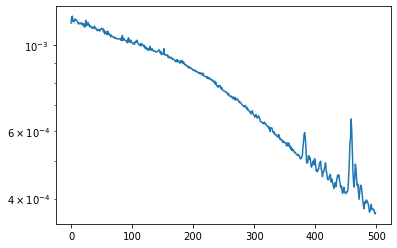

In [176]:
plt.figure()
plt.plot(history2.history['loss'])
plt.yscale('log')

In [177]:
yreshat = model2.predict(X2)

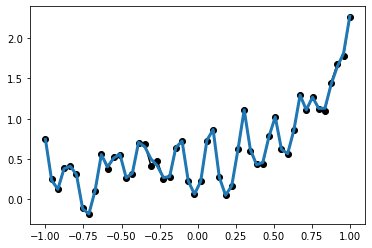

In [178]:
plt.figure()
plt.plot(X2, yres, 'k-o')
plt.plot(X2, yreshat, lw=3)

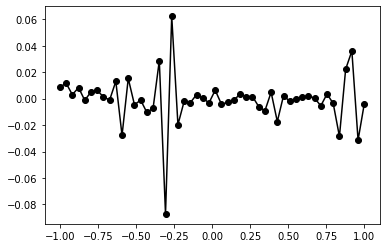

In [179]:
plt.figure()
plt.plot(X2, yres-yreshat, 'k-o')

In [180]:
yhat2 = yreshat/100+yhat

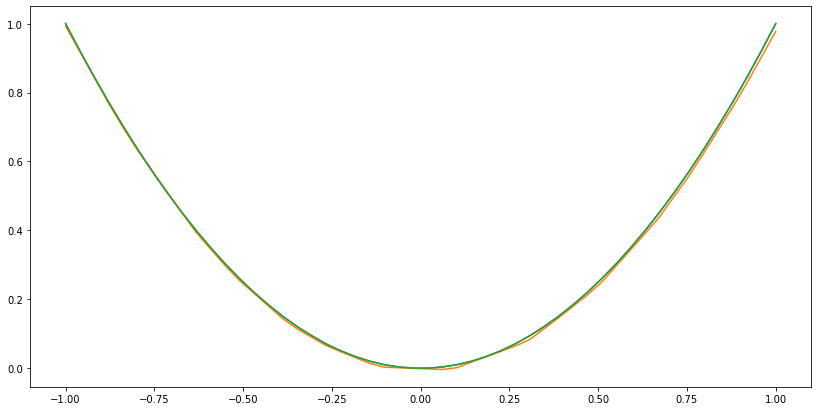

In [229]:
plt.figure(figsize=(14,7))
plt.plot(X2, y)
plt.plot(X2, yhat)
plt.plot(X2, yhat2)

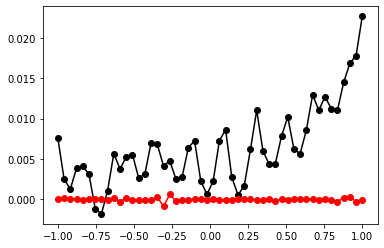

In [182]:
plt.figure()
plt.plot(X2, y - yhat, 'k-o')
plt.plot(X2, y - yhat2, 'r-o')

In [183]:
mse = tf.keras.losses.MeanSquaredError()

In [184]:
mse(y, yhat).numpy()

6.388546e-05

In [185]:
mse(y, yhat2).numpy()

3.726867e-08

In [ ]:
# up until now we have used two ANNs and got great performance
# can i use a single ANN, being a concatonation of the two above and get the same
# performance?
# I suspect no, not easily. but i will try this below

# some conclusions:
# actually it seems that I am able to get close to the same level but
# it required many more epochs and more fine grained control over
# the learning rate (i think)

In [186]:
model_concat = tf.keras.models.Sequential()
model_concat.add(tf.keras.layers.Input(shape=(input_dim,)))

#model 1
model_concat.add(tf.keras.layers.Dense(20, activation='relu'))
model_concat.add(tf.keras.layers.Dense(20, activation='tanh'))

#model2
model_concat.add(tf.keras.layers.Dense(20, activation='relu'))
model_concat.add(tf.keras.layers.Dense(20, activation='tanh'))
model_concat.add(tf.keras.layers.Dense(20, activation='relu'))
model_concat.add(tf.keras.layers.Dense(20, activation='tanh'))
model_concat.add(tf.keras.layers.Dense(20, activation='relu'))
model_concat.add(tf.keras.layers.Dense(20, activation='tanh'))
model_concat.add(tf.keras.layers.Dense(20, activation='relu'))
model_concat.add(tf.keras.layers.Dense(20, activation='tanh'))


model_concat.add(tf.keras.layers.Dense(output_dim, activation='linear'))
model_concat.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_53 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_54 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_55 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_56 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_57 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_58 (Dense)             (None, 20)              

In [217]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_concat.compile(loss='mse', optimizer=opt)
# model_concat.compile(loss='mae', optimizer=opt)

In [218]:
%%time
history_concat = model_concat.fit(X, y, epochs=2000, batch_size=50)

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 2.2849e-06
Epoch 2/2000
1/1 [==============================] - 0s 855us/step - loss: 1.4127e-05
Epoch 3/2000
1/1 [==============================] - 0s 893us/step - loss: 2.2250e-06
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.5105e-06
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 7.7723e-06
Epoch 6/2000
1/1 [==============================] - 0s 943us/step - loss: 4.6650e-06
Epoch 7/2000
1/1 [==============================] - 0s 865us/step - loss: 1.1197e-06
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 2.0038e-06
Epoch 9/2000
1/1 [==============================] - 0s 893us/step - loss: 4.4198e-06
Epoch 10/2000
1/1 [==============================] - 0s 847us/step - loss: 4.1006e-06
Epoch 11/2000
1/1 [==============================] - 0s 835us/step - loss: 1.9157e-06
Epoch 12/2000
1/1 [==============================] - 0s 909us/step - lo

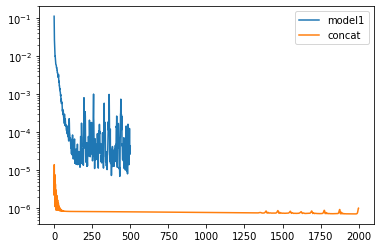

In [219]:
plt.figure()
plt.plot(history.history['loss'], label='model1')
plt.plot(history_concat.history['loss'], label='concat')
plt.yscale('log')
plt.legend()

In [220]:
yhat_concat = model_concat.predict(X)

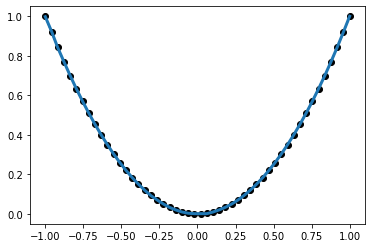

In [223]:
plt.figure()
plt.plot(X, y, 'k-o')
# plt.plot(X, yhat, lw=3)
plt.plot(X, yhat_concat, lw=3)

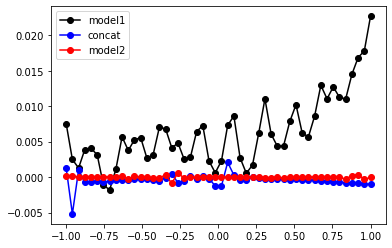

In [224]:
plt.figure()
plt.plot(X, y-yhat, 'k-o', label='model1')
plt.plot(X, y-yhat_concat, 'b-o', label='concat')
plt.plot(X2, y - yhat2, 'r-o', label='model2')
plt.legend()

In [225]:
mse(y, yhat).numpy()

6.388546e-05

In [226]:
mse(y, yhat_concat).numpy()

9.770429e-07

In [227]:
mse(y, yhat2).numpy()

3.726867e-08